# Homework Assignment 2


## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [0]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

def get_points(s, tag_name, class_name):
  # This function returns the points using the tag name and the class name
  soup = BeautifulSoup(s, 'html.parser')
  tag_list = soup.findAll(tag_name, attrs={'class': class_name})
  votes = []
  for t in tag_list:
    points = int(''.join(c for c in t.text.strip() if c.isdigit()))
    votes.append(points)
  return votes

def get_titles(s, tag_name, class_name):
  # This titles returns the points using the tag name and the class name
  soup = BeautifulSoup(s, 'html.parser')
  tag_list = soup.findAll(tag_name, attrs={'class': class_name})
  titles = []
  for i,t in enumerate(tag_list):
    if i % 2 == 0:
      continue
    # Find all of the text between link tags and strip out the html
    titles.append(t.find('a').getText()) 
  return titles

def get_titles_and_numbers(html):
  # The requested function:
  # unction that collects all titles and number of votes for each title of a given hacker news page
  u = html
  s = requests.get(u).content.decode('utf-8')
  titles = get_titles(s, 'td', 'title')
  points = get_points(s, 'span', 'score')
  return titles, points

titles, points = get_titles_and_numbers(html='https://news.ycombinator.com/')
for title, votes in zip(titles, points):
    print(f'Title: {title} | Votes: {votes}')

Title: Linux 5.6 | Votes: 99
Title: Lead-Free Solder Is Better for You | Votes: 215
Title: The origin story of the N95 mask | Votes: 136
Title: Server-Side Only React with Next | Votes: 31
Title: Microsoft: Cloud services demand up, prioritization rules in place | Votes: 423
Title: Show HN: RapidFuzz – A fast string matching library for Python | Votes: 57
Title: French companies benefiting from state aid can't buy back shares | Votes: 140
Title: Grab your crayons, it’s coloring time | Votes: 241
Title: A Definitive Guide to Enabling Italics in Vim and Tmux | Votes: 49
Title: Covid-19 Sanity – Covid-19 papers from bioRxiv/medRxiv searchable and sortable | Votes: 73
Title: Neanderthals Feasted on Seafood, Seabirds, Perhaps Even Dolphins | Votes: 31
Title: Coding Stories: Coding on the C64 (2015) | Votes: 30
Title: Vuiet, the long road to building my own music player in Lisp | Votes: 14
Title: Determining an Election in K | Votes: 56
Title: Cellular Automata: Rule 30 fed as input to Conwa

**Question 2**:  Write a function that collects data on four Harry Potter movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [0]:
! pip install tmdbv3api
from tmdbv3api import TMDb, Movie

def collect_harry_potter_data(title, num_of_movies):
  tmdb = TMDb()
  tmdb.api_key = '' # TODO: Remove this API !!!!
  movie = Movie()

  search = movie.search(title)[:num_of_movies]
  for res in search:
      print(f'ID: {res.id}| Title: {res.title}| Ranking: {res.vote_average} | Overview: {res.overview}| | Poster: {res.poster_path}')

collect_harry_potter_data("Harry Potter and the", 4)

ID: 671| Title: Harry Potter and the Philosopher's Stone| Ranking: 7.8 | Overview: Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a powerful wizard -- with a place waiting for him at the Hogwarts School of Witchcraft and Wizardry. As he learns to harness his newfound powers with the help of the school's kindly headmaster, Harry uncovers the truth about his parents' deaths -- and about the villain who's to blame.| | Poster: /gHPtCmMeDqjaGqnMrWGDmD3nKd2.jpg
ID: 767| Title: Harry Potter and the Half-Blood Prince| Ranking: 7.7 | Overview: As Harry begins his sixth year at Hogwarts, he discovers an old book marked as 'Property of the Half-Blood Prince', and begins to learn more about Lord Voldemort's dark past.| | Poster: /bFXys2nhALwDvpkF3dP3Vvdfn8b.jpg
ID: 672| Title: Harry Potter and the Chamber of Secrets| Ranking: 7.7 | Overview: Cars fly, trees fight back, and a mysterious house-elf comes to warn Harry Pot

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [0]:
# which question to answer - put your ID number and run the code 
your_id  = ""
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 2 and 4


In [0]:
!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

import numpy as np
import pandas as pd
import json
import os
#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
# api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# searching for the dataset
!rm -r ./datasets/kickstarter/
!mkdir -p ./datasets/kickstarter/data
!mkdir -p ./datasets/kickstarter/zip
!mkdir -p ./datasets/kickstarter/sql
!ls datasets/kickstarter/data

!kaggle datasets list -s kickstarter
# download the dataset from Kaggle and unzip it
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter/zip
!unzip ./datasets/kickstarter/zip/*.zip -d ./datasets/kickstarter/data
!ls ./datasets/kickstarter/zip/
!ls ./datasets/kickstarter/data/
!ls ./datasets/kickstarter/sql/

df = pd.read_csv('./datasets/kickstarter/data/ks-projects-201801.csv')
df.fillna(0)
print(df.head(5))

ref                                              title                                        size  lastUpdated          downloadCount  
-----------------------------------------------  ------------------------------------------  -----  -------------------  -------------  
kemical/kickstarter-projects                     Kickstarter Projects                         37MB  2018-02-08 09:02:30          35479  
socathie/kickstarter-project-statistics          Kickstarter Project Statistics                1MB  2019-11-14 06:38:31           5358  
codename007/funding-successful-projects          Funding Successful Projects on Kickstarter   20MB  2017-06-20 17:37:38           2420  
yashkantharia/kickstarter-campaigns              Kickstarter Campaigns                        12MB  2019-03-03 13:46:08            450  
oscarvilla/kickstarter-nlp                       kickstarter NLP                              11MB  2018-08-09 01:38:57            208  
wood2174/mapkickstarter                  

**Question 1:** On average which project category received the highest number of backers? (15 pt) 

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

In [0]:
def get_avg_projcet_cat_with_highest_pledged_usd(num):
  return df.groupby(["category"]).mean().sort_values(by="usd pledged", ascending=False).head(num)
df_to_print = get_avg_projcet_cat_with_highest_pledged_usd(1)
pd.set_option('display.max_columns', None)
print(df_to_print)

                       ID         goal       pledged     backers  usd pledged  \
category                                                                        
3D Printing  1.075251e+09  47804.43631  71193.390117  232.472914  52103.44437   

             usd_pledged_real  usd_goal_real  
category                                      
3D Printing      66323.861611   46619.814466  


**Question 3:** In which month is there the highest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

[Text(0, 0, '3D Printing'),
 Text(0, 0, 'Camera Equipment'),
 Text(0, 0, 'Sound'),
 Text(0, 0, 'Gaming Hardware'),
 Text(0, 0, 'Hardware'),
 Text(0, 0, 'Wearables'),
 Text(0, 0, 'Fabrication Tools'),
 Text(0, 0, 'Tabletop Games'),
 Text(0, 0, 'Robots'),
 Text(0, 0, 'Flight')]

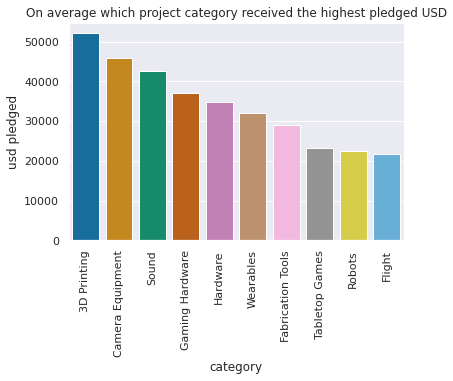

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", context="notebook")
data_to_plot = get_avg_projcet_cat_with_highest_pledged_usd(10)
g = sns.barplot(x=data_to_plot.index, y=data_to_plot["usd pledged"], palette="colorblind")

g.set_title("On average which project category received the highest pledged USD")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer one of following questions:

In [0]:
# searching for the dataset
!rm -r ./datasets/marvel/
!mkdir -p ./datasets/marvel/data
!mkdir -p ./datasets/marvel/zip
!mkdir -p ./datasets/marvel/sql
!ls datasets/marvel/data

!kaggle datasets list -s marvel
# download the dataset from Kaggle and unzip it
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/marvel/zip
!unzip ./datasets/marvel/zip/*.zip -d ./datasets/marvel/data
!ls ./datasets/marvel/zip/
!ls ./datasets/marvel/data/
!ls ./datasets/marvel/sql/

rm: cannot remove './datasets/marvel/': No such file or directory
ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
csanhueza/the-marvel-universe-social-network              The Marvel Universe Social Network                  3MB  2017-01-28 11:28:49           3783  
dannielr/marvel-superheroes                               Marvel Superheroes                                  8MB  2018-07-29 07:50:32           1777  
fivethirtyeight/fivethirtyeight-comic-characters-dataset  FiveThirtyEight Comic Characters Dataset          597KB  2019-04-26 15:01:41           7582  
leonardopena/marvel-vs-dc                                 Marvel vs DC                                        2KB  2019-12-19 21:58:38            164  
yrdasilva/marvel-chara

In [0]:
df_marvel_netwrok = pd.read_csv('./datasets/marvel/data/hero-network.csv')
df_marvel_netwrok.drop_duplicates(inplace=True)
print(df_marvel_netwrok.head(5))

df_marvel_nodes = pd.read_csv('./datasets/marvel/data/nodes.csv')
df_marvel_nodes.drop_duplicates(inplace=True)
print(df_marvel_nodes.head(5))

                  hero1                 hero2
0         LITTLE, ABNER        PRINCESS ZANDA
1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
6  STEELE, SIMON/WOLFGA      FORTUNE, DOMINIC
7  STEELE, SIMON/WOLFGA   ERWIN, CLYTEMNESTRA
                   node   type
0               2001 10  comic
1                2001 8  comic
2                2001 9  comic
3  24-HOUR MAN/EMMANUEL   hero
4  3-D MAN/CHARLES CHAN   hero


**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [0]:
df_marvel_netwrok_copy = df_marvel_netwrok.copy()
df_marvel_netwrok_copy=df_marvel_netwrok_copy.reindex(columns=['hero2', 'hero1'])
df_marvel_netwrok_copy = df_marvel_netwrok_copy.rename(columns={"hero1": "hero2", "hero2": "hero1"})
hero_df_two_sides = df_marvel_netwrok.append(df_marvel_netwrok_copy)
hero_df_two_sides = hero_df_two_sides.drop_duplicates(keep='first')

hero_friendly = hero_df_two_sides.groupby("hero1").count().sort_values('hero2', ascending=False)
hero_friendly.head(10)

,hero2
hero1,
CAPTAIN AMERICA,1907
SPIDER-MAN/PETER PAR,1737
IRON MAN/TONY STARK,1522
THING/BENJAMIN J. GR,1416
MR. FANTASTIC/REED R,1379
WOLVERINE/LOGAN,1371
HUMAN TORCH/JOHNNY S,1361
SCARLET WITCH/WANDA,1325
THOR/DR. DONALD BLAK,1289


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

Number of Edges 8400
Note: Michel said it is okay to use random color instead using the nodes.csv since there are only two types of nodes


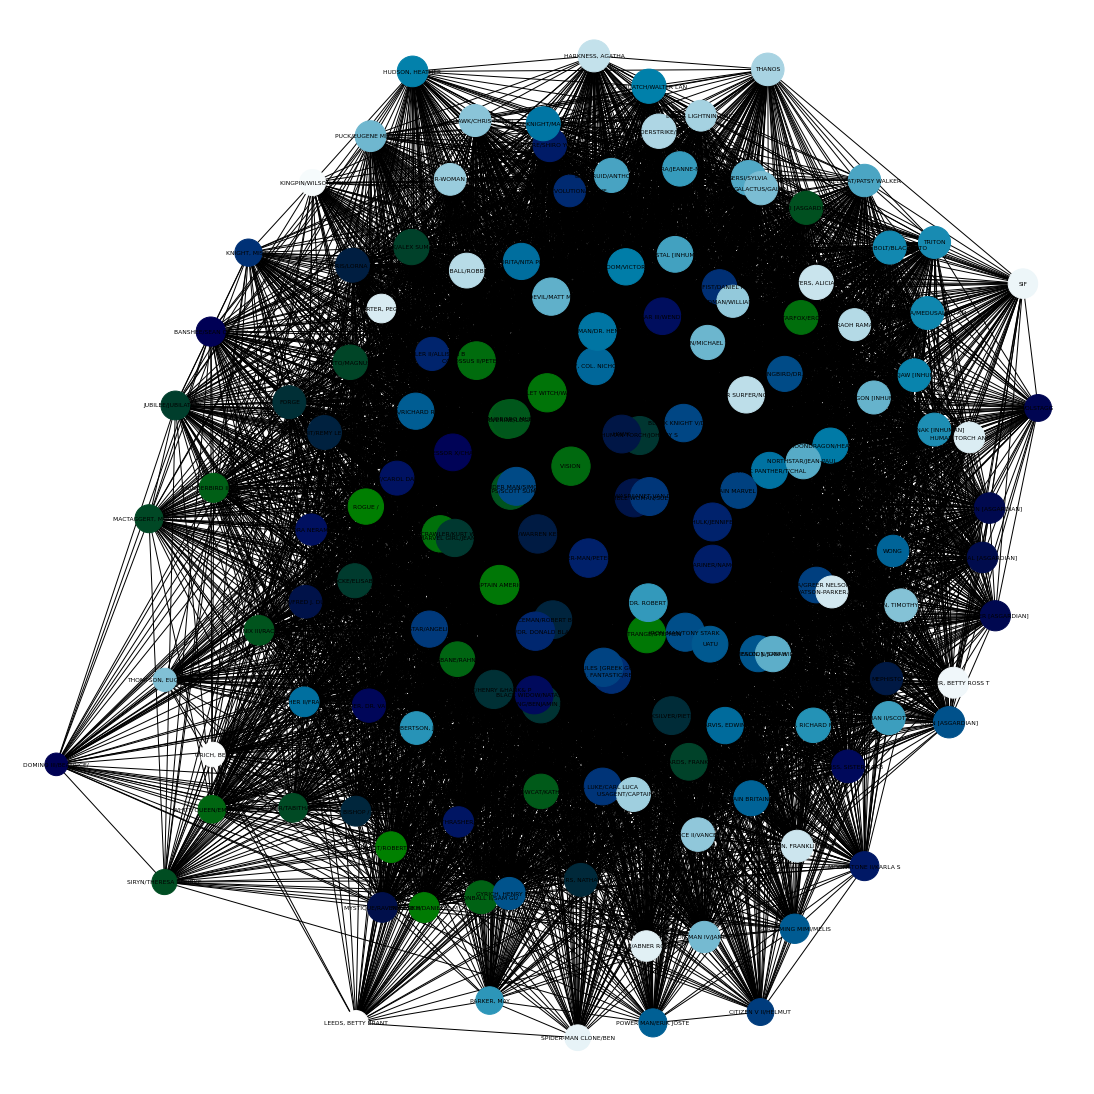

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
top_num = 150
top_150_hero_friendly = hero_friendly.head(top_num)
top_150 = []
for name in top_150_hero_friendly.iterrows():
  top_150.append(name[0])
# print(top_150)

hero_pd = hero_df_two_sides.merge(df_marvel_nodes, how='left', left_on="hero1", right_on='node')
hero_pd = hero_pd[['hero1', 'type']]
hero_pd.drop_duplicates(inplace=True)

verticies = set(top_150)
links = []
for v in verticies:
  df_hero = hero_df_two_sides[hero_df_two_sides['hero1']==v]
  for index, row in df_hero.iterrows():
    hero_2_to_add = row['hero2']
    if hero_2_to_add not in top_150:
      continue
    elif (hero_2_to_add, v) in links:
      continue
    links.append((v,hero_2_to_add))

g = nx.Graph()
print(f'Number of Edges {len(links)}')
g.add_edges_from(links)
d = nx.degree(g)
# print(d)
d = [(d[node]+1) * 10 for node in g.nodes()]
nx.info(g)

print('Note: Michel said it is okay to use random color instead using the nodes.csv since there are only two types of nodes')
plt.figure(3, figsize=(15,15))
nx.draw(g, with_labels=True, node_size=d, node_color=range(top_num), cmap=plt.cm.ocean, font_size=6)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)

In [0]:
""" Write to GEXF """
# Use 1.2draft so you do not get a deprecated warning in Gelphi
nx.write_gexf(g, "file2.gexf", version="1.2draft")

from google.colab import files
files.download('file2.gexf') 

![alt text](https://drive.google.com/uc?id=17AdgNN56gKtb5fDoR8PuJlSZ0ni5cWC6)
